In [1]:
#Importing the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sns
sns.set()

In [2]:
iris = pd.read_csv("E:\Python All in One\DATA_SETS\Kaggler\Iris.csv")

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Checking the Nullity of Columns
pd.isnull(iris).any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

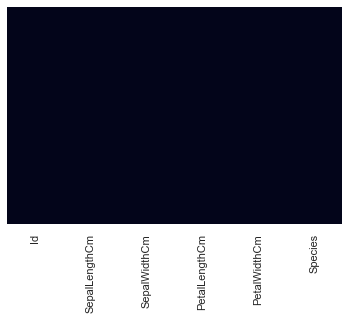

In [5]:
#Drawing the heatmap to check the nullity of columns
sns.heatmap(iris.isnull() ,yticklabels = False, cbar = False)

In [6]:
unique = iris.Species.unique()
print(unique)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [7]:
iris_sepal_length_max=[]
iris_sepal_length_min=[]
for i in unique:
    iris_sepal_length_max.append(iris.loc[iris['Species']==i, 'SepalLengthCm'].max())
    iris_sepal_length_min.append(iris.loc[iris['Species']==i, 'SepalLengthCm'].min())

print(iris_sepal_length_max)
print(iris_sepal_length_min)

[5.8, 7.0, 7.9]
[4.3, 4.9, 4.9]


# Plotting the Sepal And Petal Dimensions

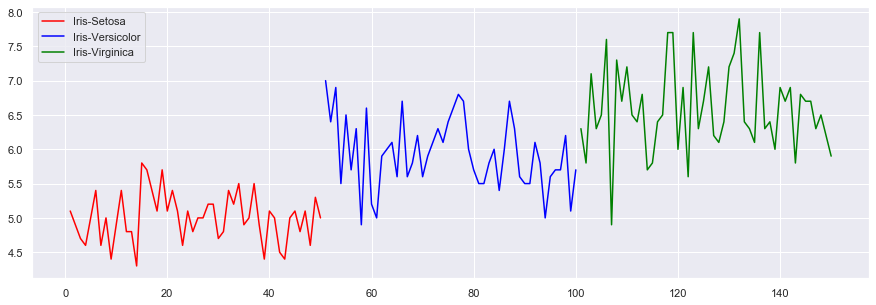

In [8]:
#Plotting the sepal length
pt.figure(figsize=(15,5))
pt.plot(iris.loc[iris.Species == 'Iris-setosa', 'Id'].values, 
        iris.loc[iris.Species == 'Iris-setosa', 'SepalLengthCm'].values, label = 'Iris-Setosa', c='red')
pt.plot(iris.loc[iris.Species == 'Iris-versicolor', 'Id'].values, 
       iris.loc[iris.Species == 'Iris-versicolor', 'SepalLengthCm'].values, label = 'Iris-Versicolor', c='blue')
pt.plot(iris.loc[iris.Species == 'Iris-virginica', 'Id'].values,
       iris.loc[iris.Species == 'Iris-virginica', 'SepalLengthCm'].values, label = 'Iris-Virginica', c='green'
       )     
pt.legend()
pt.show()

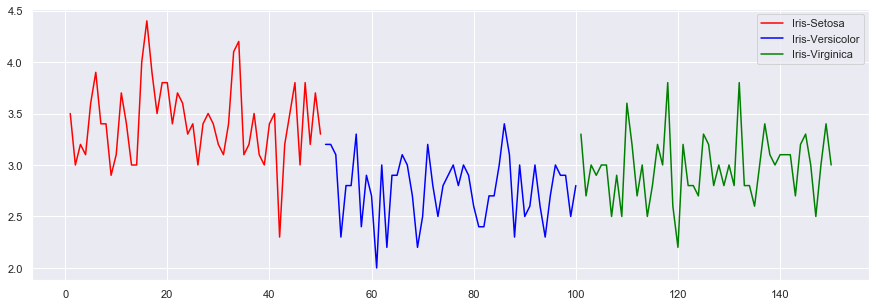

In [9]:
#Plotting the sepal Width
pt.figure(figsize=(15,5))
pt.plot(iris.loc[iris.Species == 'Iris-setosa', 'Id'].values, 
        iris.loc[iris.Species == 'Iris-setosa', 'SepalWidthCm'].values, label = 'Iris-Setosa', c='red')
pt.plot(iris.loc[iris.Species == 'Iris-versicolor', 'Id'].values, 
       iris.loc[iris.Species == 'Iris-versicolor', 'SepalWidthCm'].values, label = 'Iris-Versicolor', c='blue')
pt.plot(iris.loc[iris.Species == 'Iris-virginica', 'Id'].values,
       iris.loc[iris.Species == 'Iris-virginica', 'SepalWidthCm'].values, label = 'Iris-Virginica', c='green'
       )     
pt.legend()
pt.show()

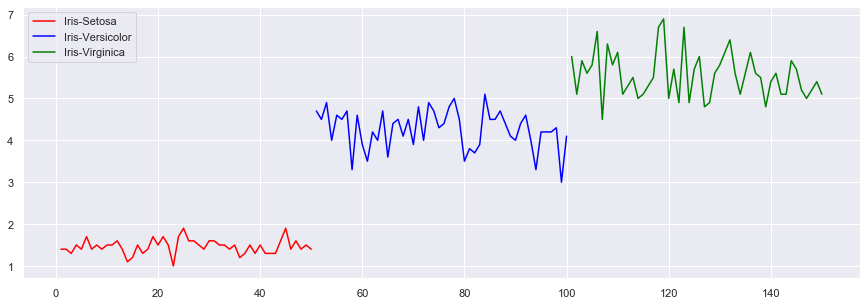

In [10]:
#Plotting the petal length
pt.figure(figsize=(15,5))
pt.plot(iris.loc[iris.Species == 'Iris-setosa', 'Id'].values, 
        iris.loc[iris.Species == 'Iris-setosa', 'PetalLengthCm'].values, label = 'Iris-Setosa', c='red')
pt.plot(iris.loc[iris.Species == 'Iris-versicolor', 'Id'].values, 
       iris.loc[iris.Species == 'Iris-versicolor', 'PetalLengthCm'].values, label = 'Iris-Versicolor', c='blue')
pt.plot(iris.loc[iris.Species == 'Iris-virginica', 'Id'].values,
       iris.loc[iris.Species == 'Iris-virginica', 'PetalLengthCm'].values, label = 'Iris-Virginica', c='green'
       )     
pt.legend()
pt.show()

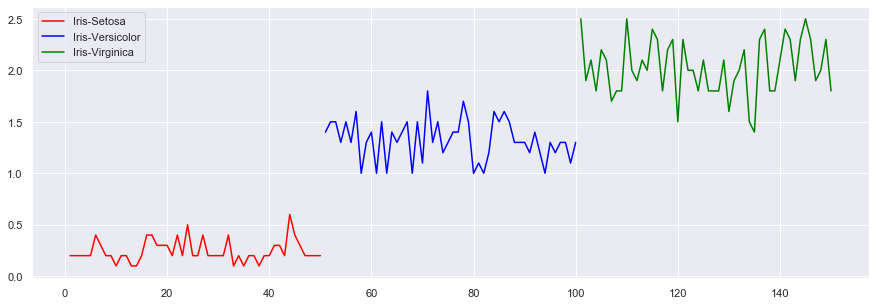

In [11]:
#Plotting the sepal Width
pt.figure(figsize=(15,5))
pt.plot(iris.loc[iris.Species == 'Iris-setosa', 'Id'].values, 
        iris.loc[iris.Species == 'Iris-setosa', 'PetalWidthCm'].values, label = 'Iris-Setosa', c='red')
pt.plot(iris.loc[iris.Species == 'Iris-versicolor', 'Id'].values, 
       iris.loc[iris.Species == 'Iris-versicolor', 'PetalWidthCm'].values, label = 'Iris-Versicolor', c='blue')
pt.plot(iris.loc[iris.Species == 'Iris-virginica', 'Id'].values,
       iris.loc[iris.Species == 'Iris-virginica', 'PetalWidthCm'].values, label = 'Iris-Virginica', c='green'
       )     
pt.legend()
pt.show()

# Box Plots of Sepal and Petal Dimensions

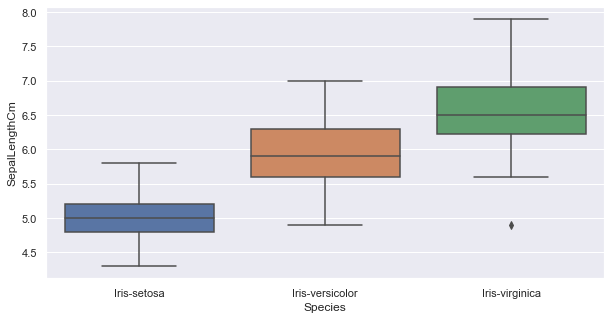

In [12]:
pt.figure(figsize=(10, 5))
sns.boxplot(x = 'Species', y = 'SepalLengthCm', data = iris)

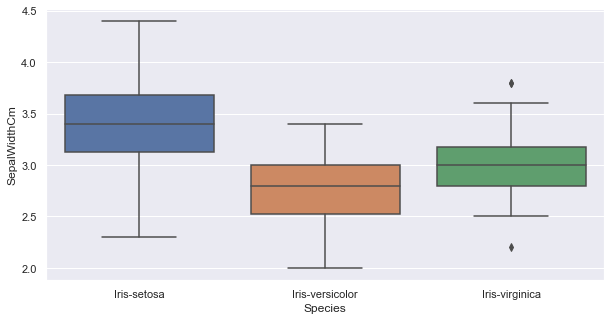

In [13]:
pt.figure(figsize=(10, 5))
sns.boxplot(x = 'Species', y = 'SepalWidthCm', data = iris)

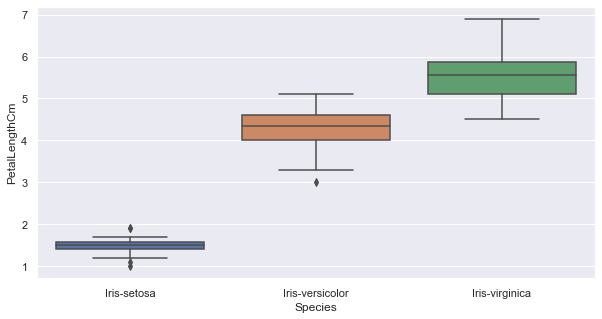

In [14]:
pt.figure(figsize=(10, 5))
sns.boxplot(x = 'Species', y = 'PetalLengthCm', data = iris)

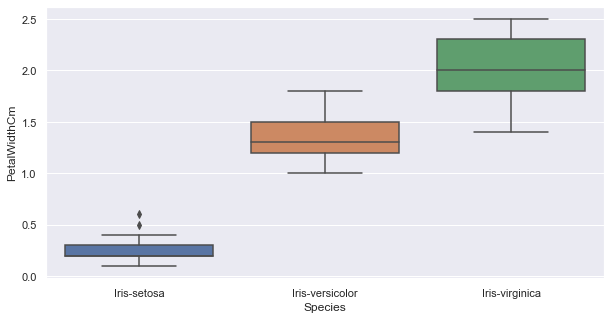

In [15]:
pt.figure(figsize=(10, 5))
sns.boxplot(x = 'Species', y = 'PetalWidthCm', data = iris)

In [16]:
#Mapping the Species Text to Numbers
species_map = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
iris['Species'] = iris['Species'].map(species_map)

In [17]:
#Separating the Dependent and Independent Variables
x = iris.iloc[:, 1:5].values
y = iris.iloc[:, 5].values

In [18]:
#Splitting the Training and Test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .33, random_state = 0)

# Building our Classification Models

In [32]:
# Score Function
def score(classifier, y_real, y_mach):
    from sklearn.metrics import confusion_matrix, accuracy_score
    cm = confusion_matrix(y_real, y_mach)
    ac = accuracy_score(y_real, y_mach)*100
    return cm, ac

In [33]:
# ---- Logistic Regression ----
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

log_cm, log_ac = score(classifier, y_test, y_pred)
print(log_cm, "\n", log_ac)


[[16  0  0]
 [ 0 14  5]
 [ 0  0 15]] 
 90.0


C:\Users\Gaurav SINGH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gaurav SINGH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [34]:
log_df = pd.DataFrame(y_test, y_pred).reset_index()
log_df.rename(columns = {'index':'Real_Value', 0:'Predicted_values'}, inplace = True)


In [35]:
inv_map = {0: 'Iris-Setosa', 1:'Iris-versicolor', 2:'Iris-virginia'}
log_df['Real_Value'] = log_df['Real_Value'].map(inv_map)

In [36]:
log_df['Predicted_values'] = log_df['Predicted_values'].map(inv_map)
log_df

,Real_Value,Predicted_values
0,Iris-virginia,Iris-virginia
1,Iris-versicolor,Iris-versicolor
2,Iris-Setosa,Iris-Setosa
3,Iris-virginia,Iris-virginia
4,Iris-Setosa,Iris-Setosa
5,Iris-virginia,Iris-virginia
6,Iris-Setosa,Iris-Setosa
7,Iris-versicolor,Iris-versicolor
8,Iris-versicolor,Iris-versicolor
9,Iris-versicolor,Iris-versicolor


In [37]:
# ---- K Means Algorithm ----

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

k_cm, k_ac = score(classifier, y_test, y_pred)
print(k_cm, "\n", k_ac)


[[16  0  0]
 [ 0 18  1]
 [ 0  0 15]] 
 98.0


In [39]:
# --- Linear Support Vector Machine ----

from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

s_cm, s_ac = score(classifier, y_test, y_pred)
print(s_cm, "\n", s_ac)


[[16  0  0]
 [ 0 18  1]
 [ 0  0 15]] 
 98.0


In [40]:
# ---- Naive Bayes Algorithm ----

from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

n_cm, n_ac = score(classifier, y_test, y_pred)
print(n_cm, "\n", n_ac)


[[16  0  0]
 [ 0 19  0]
 [ 0  2 13]] 
 96.0


In [41]:
# ---- Decision Tree ----

from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

d_cm, d_ac = score(classifier, y_test, y_pred)
print(d_cm, "\n", d_ac)


[[16  0  0]
 [ 0 18  1]
 [ 0  0 15]] 
 98.0


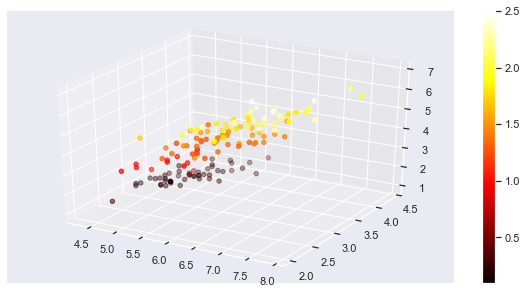

In [42]:
from mpl_toolkits.mplot3d import Axes3D
fig = pt.figure(figsize = (10,5))
x1, x2, x3, x4 = x[:,0], x[:, 1], x[:, 2], x[:, 3]
ax = fig.add_subplot(projection = '3d')
im = ax.scatter(x1, x2, x3, c = x4, cmap = pt.hot())
pt.colorbar(im)
pt.show()

In [43]:
# ---- Random Forest ----

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 17,  criterion = 'gini', random_state = 0)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

r_cm, r_ac = score(classifier, y_test, y_pred)
print(r_cm, "\n", r_ac)


[[16  0  0]
 [ 0 18  1]
 [ 0  1 14]] 
 96.0


# Score Chart Of Each Classifier

In [44]:
score = [log_ac, k_ac, s_ac, n_ac, d_ac, r_ac]
name = ['Logistic', 'K_Means', 'SVM', 'Naive_Bayes', 'Decision_Tree', 'Random_Forest']
score_sheet = pd.DataFrame(score, name)
score_sheet.rename(columns = {0:'Score'}, inplace = True)
score_sheet

,Score
Logistic,90.0
K_Means,98.0
SVM,98.0
Naive_Bayes,96.0
Decision_Tree,98.0
Random_Forest,96.0


# Using Decision  Tree For our classification

In [45]:
classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
classifier.fit(x_train, y_train)

y_pred_decsion = classifier.predict(x_test)


In [46]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_pred_decsion, y_test)

print(mae)

0.02


# Creating Submission DataFrame

In [47]:
submission = pd.DataFrame(y_test, y_pred_decsion).reset_index()
submission.rename(columns = {'index':"Real_Value", 0:"Predicted_Value"}, inplace = True)

In [48]:
inv_map = {0: 'Iris-Setosa', 1:'Iris-versicolor', 2:'Iris-virginia'}
submission['Real_Value'] = submission['Real_Value'].map(inv_map)
submission['Predicted_Value'] = submission['Predicted_Value'].map(inv_map)
submission

,Real_Value,Predicted_Value
0,Iris-virginia,Iris-virginia
1,Iris-versicolor,Iris-versicolor
2,Iris-Setosa,Iris-Setosa
3,Iris-virginia,Iris-virginia
4,Iris-Setosa,Iris-Setosa
5,Iris-virginia,Iris-virginia
6,Iris-Setosa,Iris-Setosa
7,Iris-versicolor,Iris-versicolor
8,Iris-versicolor,Iris-versicolor
9,Iris-versicolor,Iris-versicolor


In [49]:
np.where(submission['Real_Value'] != submission['Predicted_Value'])

(array([37], dtype=int64),)

In [51]:
from sklearn.tree import DecisionTreeClassifier

d = DecisionTreeClassifier()